In [1]:
import cv2 as cv
from matplotlib import pyplot as plt
from PIL import Image

In [2]:
def preprocessing(image):    
    img_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    img_blur = cv.GaussianBlur(img_gray, (5, 5), 0)
    img_sobel = cv.Sobel(img_blur, cv.CV_16S, 1, 0)
    img_sobel = cv.convertScaleAbs(img_sobel)
    (thresh, img_bw) = cv.threshold(img_sobel, 0, 255, cv.THRESH_OTSU | cv.THRESH_BINARY)
    kernel = cv.getStructuringElement(cv.MORPH_RECT,(8,8))
    img_close = cv.morphologyEx(img_bw,cv.MORPH_CLOSE,kernel)
    return img_close   

In [3]:
def verifySizes(RotatedRect):
    error = 0.4
    aspect = 4.7272
    min = 15 * aspect * 15
    max = 125 * aspect * 125
    rmin = aspect - aspect * error
    rmax = aspect + aspect * error
    height,width = RotatedRect[1]
    if height==0 or width==0:
        return False
    area = height * width
    r = width/height
    if r < 1:
        r = height/width
    if (area < min or area > max) or (r < rmin or r > rmax):
        return False
    else:
        return True

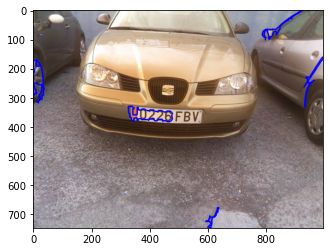

In [5]:
#funcion que encuentra y dibuja los contornos de la imagen
def contours(image):
    image = cv.imread(image)
    img = preprocessing(image)
    contours, hierarchy = cv.findContours(img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
    save = []
    rectall = []   
    for contour in contours:
        rect = cv.minAreaRect(contour)
        if verifySizes(rect):
            save.append(contour)
            rectall.append(rect)
    cv.drawContours(image, save, -1, (0,0,255),3)
    plt.imshow(image)

contours('images/real/0226FBV.jpg')